# 1.0 Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2.0 Loading the dataset

In [3]:
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 3.0 Data Exploration

In [4]:
netflix_df.shape

(8807, 12)

In this dataset we have total 8807 rows as observations and 12 columns as features

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# 5.0 Data Cleaning

Checking for the null values in the dataset

In [10]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
netflix_df.director.fillna("No Director", inplace = True)
netflix_df.cast.fillna("No Cast", inplace = True)
netflix_df.country.fillna("Country Not Given", inplace = True)

In [12]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

date_added has 10 rows null so we can remove it

In [16]:
netflix_df.dropna(subset=['date_added', 'rating', 'duration'], inplace = True)

In [17]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

* Convert date time format

In [18]:
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['day_added'] = netflix_df['date_added'].dt.day
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['year_added'].astype(int);
netflix_df['day_added'].astype(int);


In [19]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,2021,9
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Not Given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Not Given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,2021,9
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,2021,9


# 5.0 Exploratory Data Analysis

* Type: Movies and TV shows

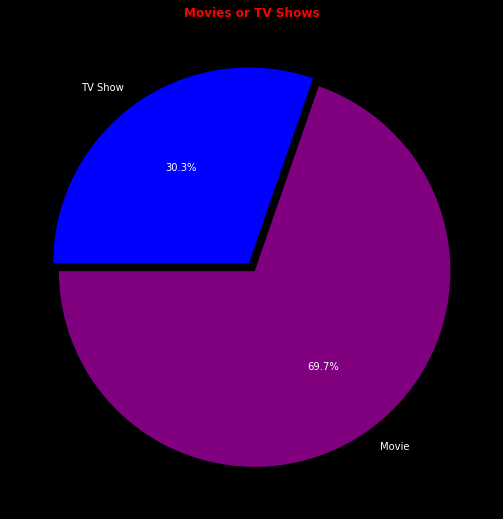

In [35]:
plt.style.use("dark_background")
plt.figure(figsize=(16,9))
plt.title("Movies or TV Shows",weight='bold',color='red')
p=plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025),labels=netflix_df.type.value_counts().index,colors=['purple','blue'],autopct='%1.1f%%',startangle=180)
plt.show()

In [33]:
# Countries by the Amount of the Produces Content
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.style.use("dark_background")



<Figure size 936x504 with 0 Axes>

<Figure size 936x504 with 0 Axes>

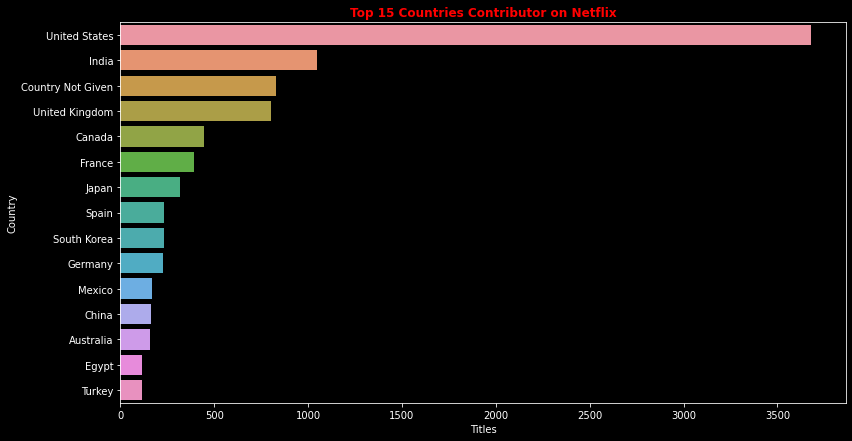

In [36]:
plt.figure(figsize=(13, 7))
g = sns.countplot(y=filtered_countries, order=filtered_countries.value_counts().index[:15])

plt.title('Top 15 Countries Contributor on Netflix',color='red',weight='bold')
plt.xlabel('Titles')
plt.ylabel('Country')

plt.show()

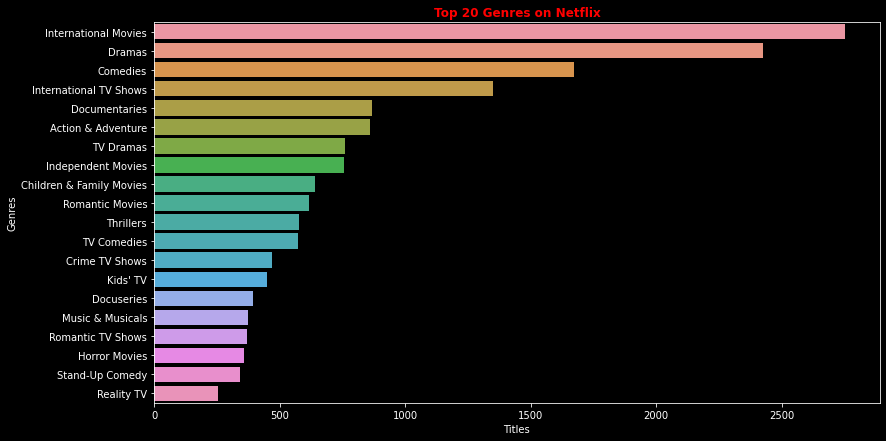

In [38]:
# Top Genres on Netflix
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix',color='red',weight='bold')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

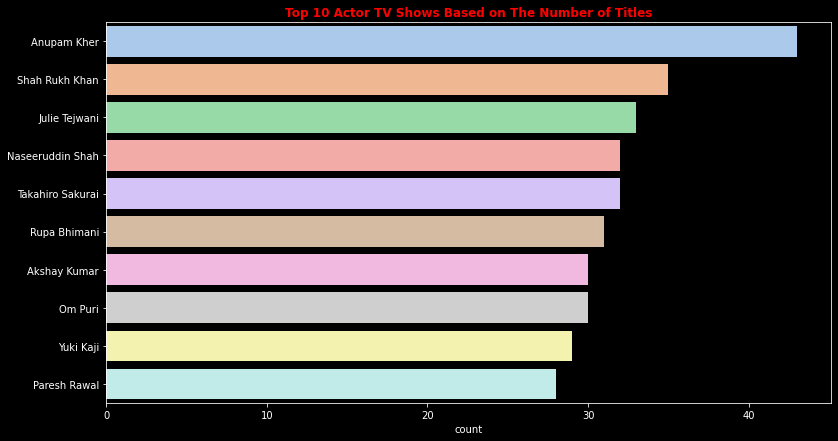

In [39]:
# Top Actor on Netflix based on the number of titles
filtered_cast_shows = netflix_df[netflix_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles',color='red',weight='bold')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

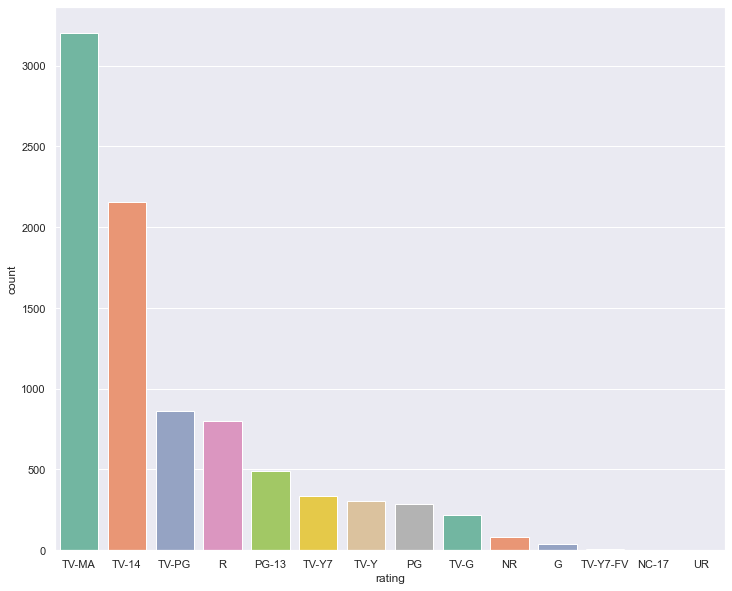

In [42]:
plt.figure(figsize=(12,10))
#sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_df, palette="Set2",
order=netflix_df['rating'].value_counts().index[0:15])


In [43]:
df = netflix_df.copy()
df=df.dropna()
df.shape


(8790, 15)

* Country

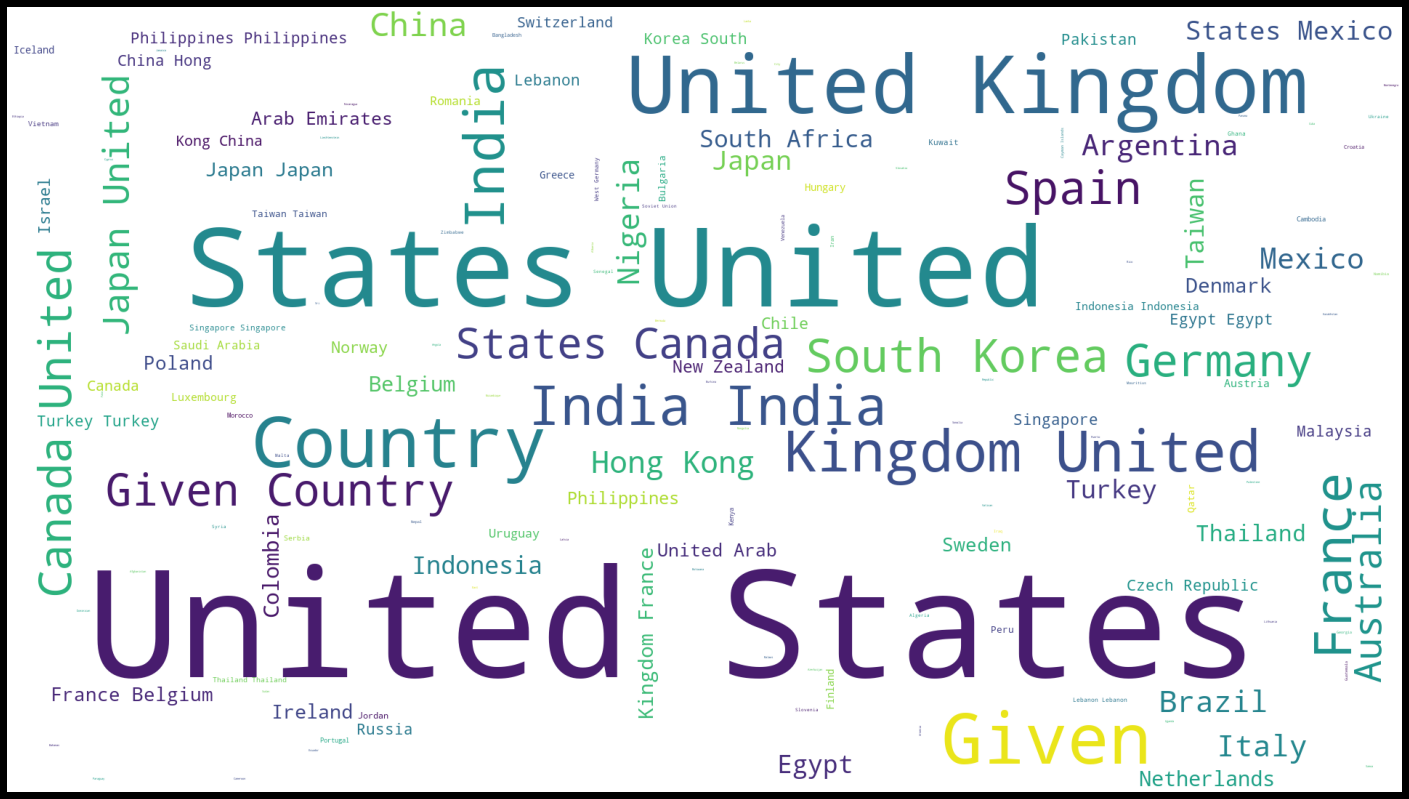

In [44]:
from wordcloud import WordCloud
plt.style.use('dark_background')
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

* Cast in the shows

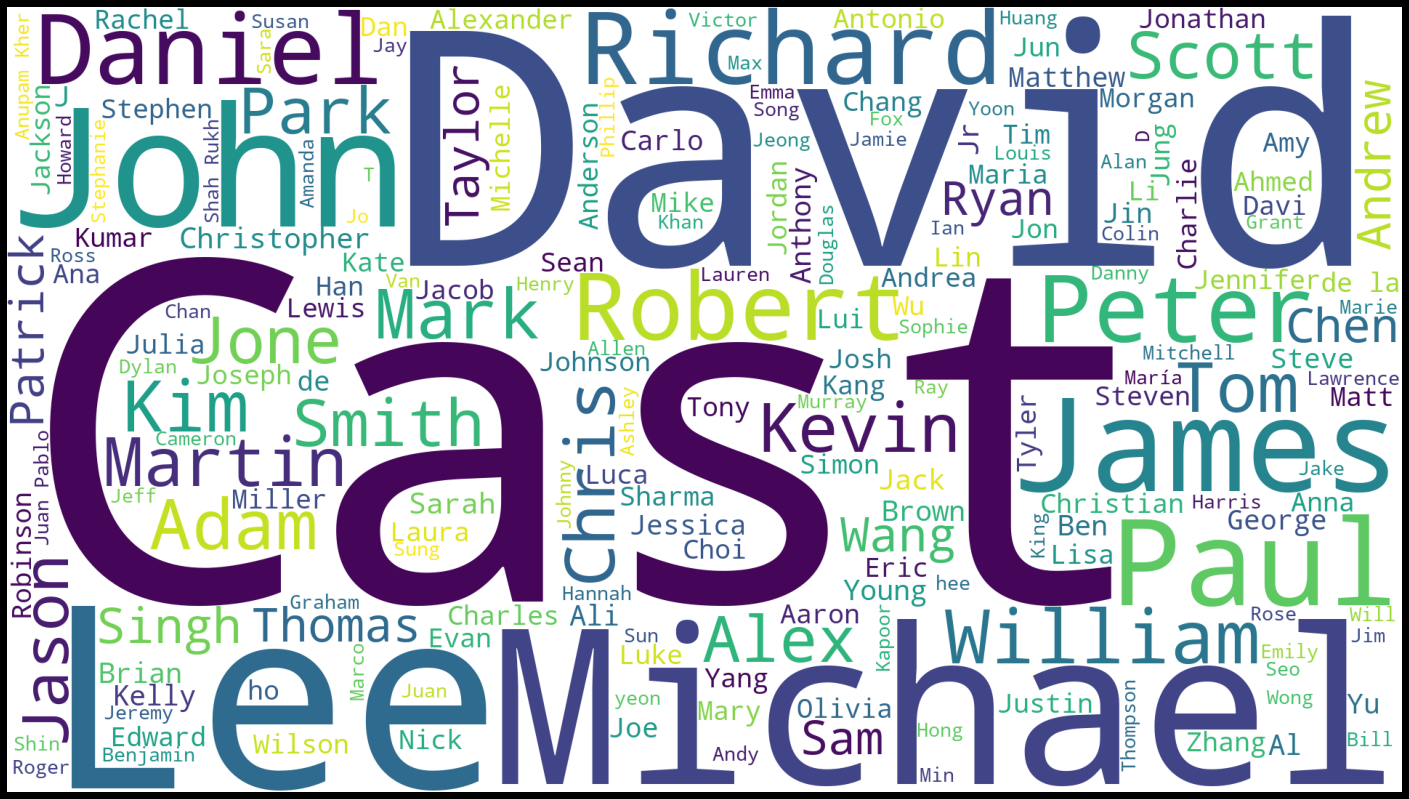

In [45]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
background_color='white',width=1920,height=1080).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

* Directors

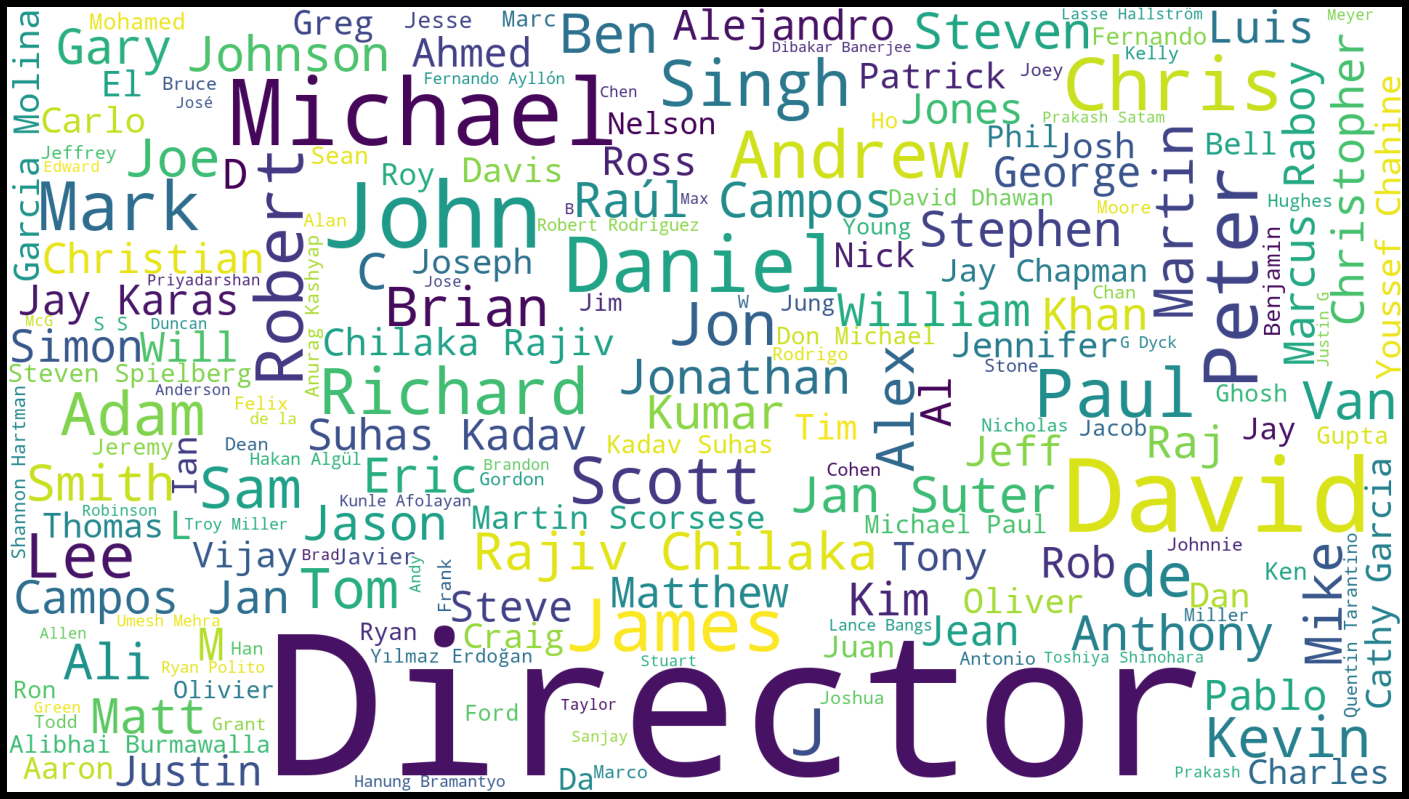

In [47]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(

    background_color='white', width=1920, height=1080).generate(" ".join(df.director))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

* Categories

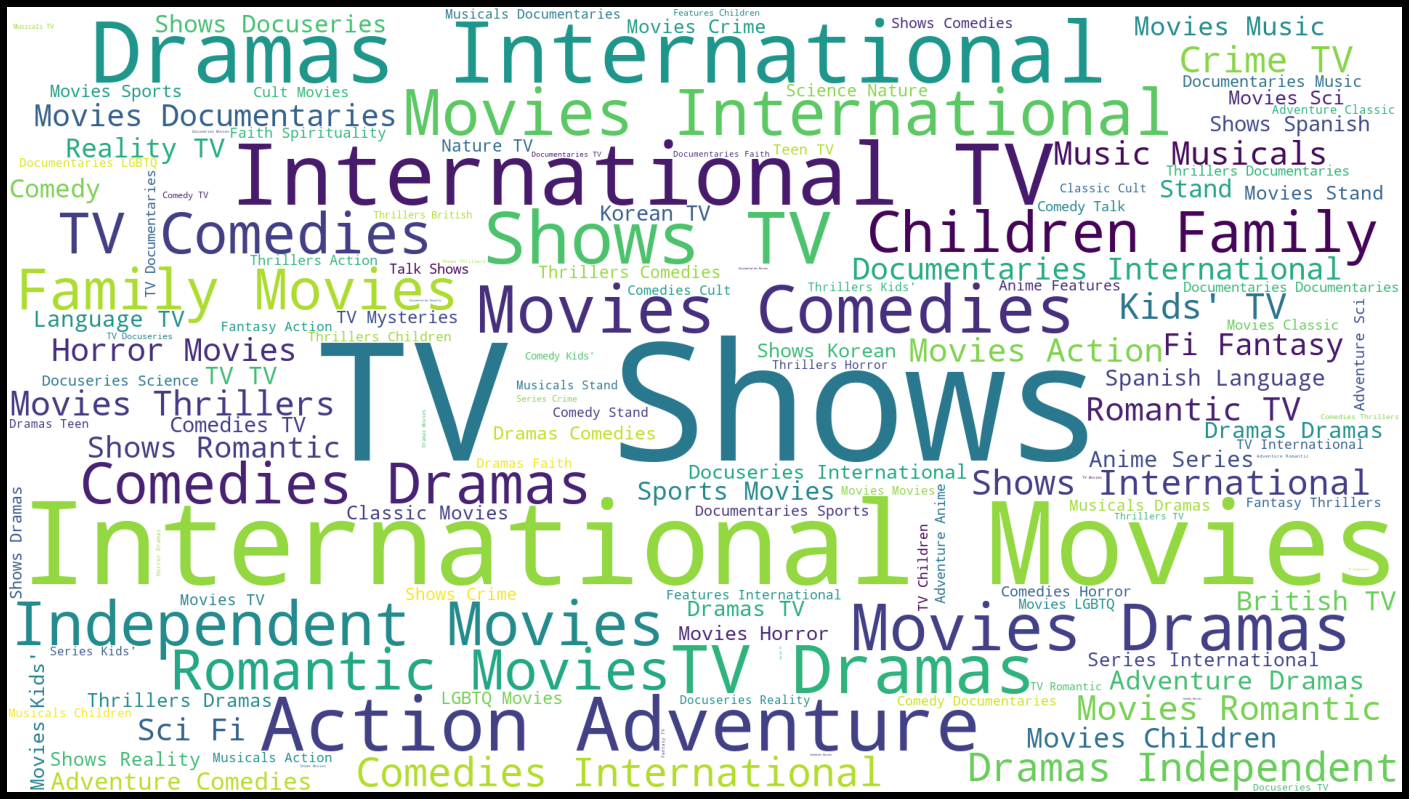

In [48]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(

    background_color='white', width=1920, height=1080).generate(" ".join(df.listed_in))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()